In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [244]:
df = pd.read_csv("survey_results_public.csv")

In [245]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [246]:
df.shape

(73268, 79)

In [247]:
df.size

5788172

In [248]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [249]:
df = df[["Country", "EdLevel", "YearsCodePro",
         "Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly" : "Salary_in_usd_yearly"},axis=1)
df = df[df["Salary_in_usd_yearly"].notnull()]

In [250]:
df.count()

Country                 38071
EdLevel                 38054
YearsCodePro            37935
Employment              38067
Salary_in_usd_yearly    38071
dtype: int64

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               38071 non-null  object 
 1   EdLevel               38054 non-null  object 
 2   YearsCodePro          37935 non-null  object 
 3   Employment            38067 non-null  object 
 4   Salary_in_usd_yearly  38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [252]:
df.size

190355

In [253]:
df.shape

(38071, 5)

In [254]:
info_t = pd.DataFrame(index=df.columns)
info_t['data_type'] = df.dtypes
info_t['total_null_count'] = df.isnull().sum()
info_t['total_unique_count'] = df.nunique()
info_t

,data_type,total_null_count,total_unique_count
Country,object,0,159
EdLevel,object,17,9
YearsCodePro,object,136,52
Employment,object,4,13
Salary_in_usd_yearly,float64,0,7909


In [255]:
df = df.dropna()

In [256]:
info_t = pd.DataFrame(index=df.columns)
info_t['data_type'] = df.dtypes
info_t['total_null_count'] = df.isnull().sum()
info_t['total_unique_count'] = df.nunique()
info_t

,data_type,total_null_count,total_unique_count
Country,object,0,159
EdLevel,object,0,9
YearsCodePro,object,0,52
Employment,object,0,13
Salary_in_usd_yearly,float64,0,7890


In [257]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary_in_usd_yearly
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [258]:
df = df.loc[df["Employment"] == "Employed, full-time", :]
df = df.drop(columns=["Employment"])

def limiting_countries(categories, limit):
    categorical_map = {}
    for category, count in categories.items():
        categorical_map[category] = category if count >= limit else "Others"
    return categorical_map

limited_countries = limiting_countries(df["Country"].value_counts(), 300)
df['Country'] = df['Country'].map(limited_countries)


In [259]:
df.tail()

,Country,EdLevel,YearsCodePro,Salary_in_usd_yearly
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,115000.0
73118,Others,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,57720.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,70000.0
73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,35192.0
73121,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,75384.0


In [260]:
df.count()

Country                 31382
EdLevel                 31382
YearsCodePro            31382
Salary_in_usd_yearly    31382
dtype: int64

In [261]:
df['Country'].value_counts()

United States of America                                7858
Others                                                  7627
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Turkey                  

In [262]:
def limiting_countries(categories, limit):
    categorical_map = {}
    for category, count in categories.items():
        categorical_map[category] = category if count >= limit else "Others"
    return categorical_map

limited_countries = limiting_countries(df["Country"].value_counts(), 300)


In [263]:
df['Country'] = df['Country'].map(limited_countries)

In [264]:
df.Country.value_counts()

United States of America                                7858
Others                                                  7627
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Turkey                  

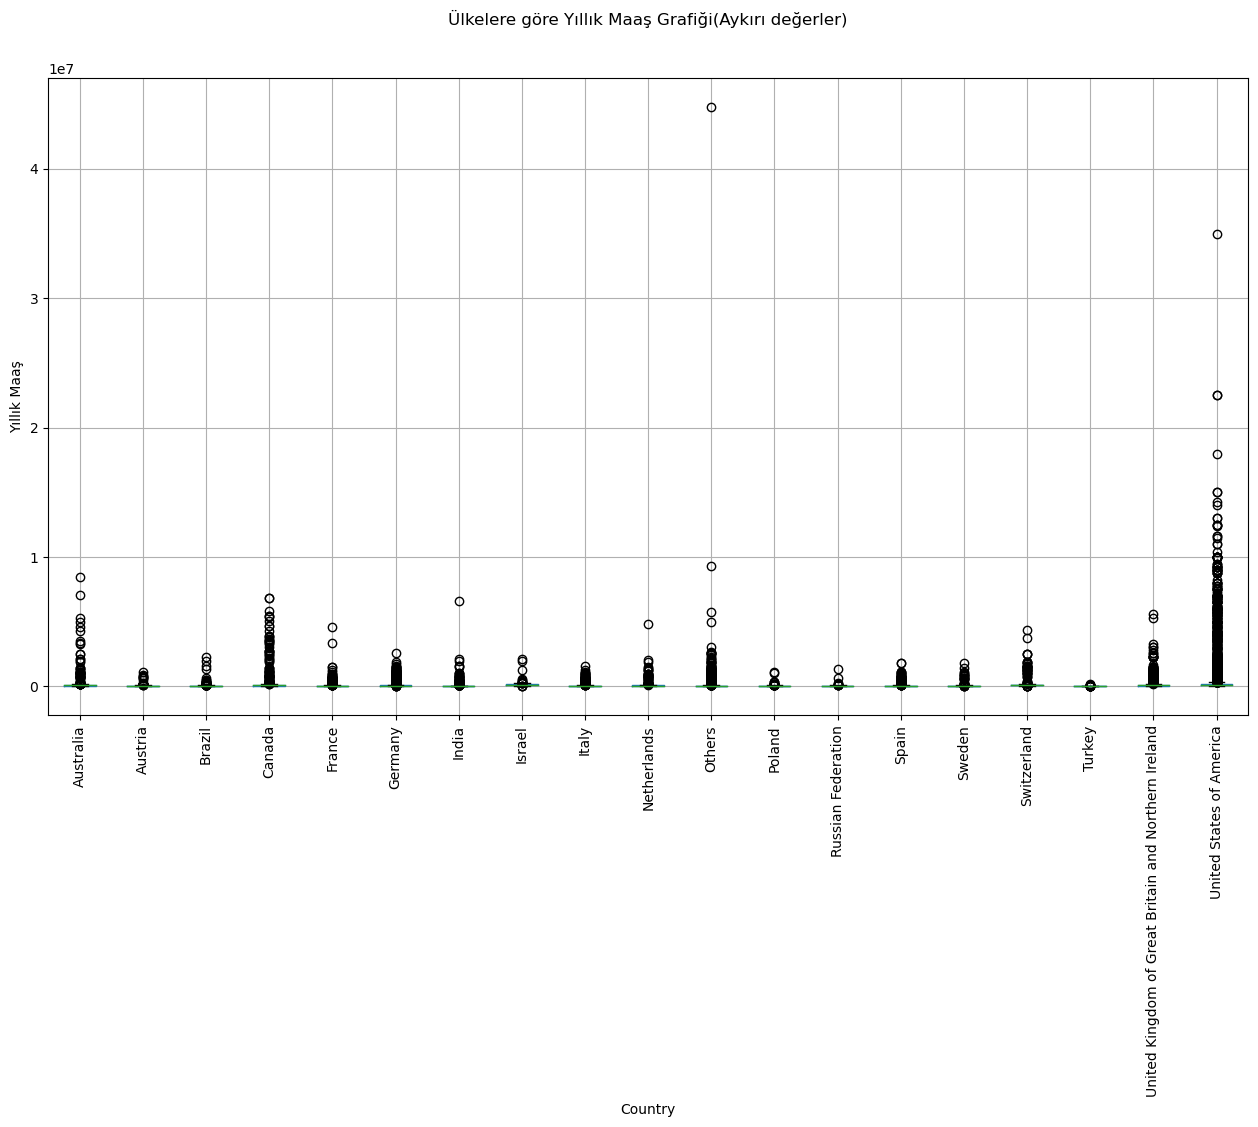

In [265]:
fig, ax = plt.subplots(1,1,figsize=(15,8.5))
df.boxplot('Salary_in_usd_yearly','Country',ax=ax)
plt.suptitle('Ülkelere göre Yıllık Maaş Grafiği(Aykırı değerler)')
plt.title('')
plt.ylabel('Yıllık Maaş')
plt.xticks(rotation=90)
plt.show()

In [266]:
df['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'Netherlands', 'United States of America', 'Others', 'Austria',
       'Italy', 'Canada', 'Germany', 'Poland', 'France', 'Brazil',
       'Sweden', 'Spain', 'Turkey', 'India', 'Switzerland', 'Australia',
       'Russian Federation'], dtype=object)

In [267]:
df = df.loc[df['Country'] != 'Others']
df.loc[df['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'Great Britain'

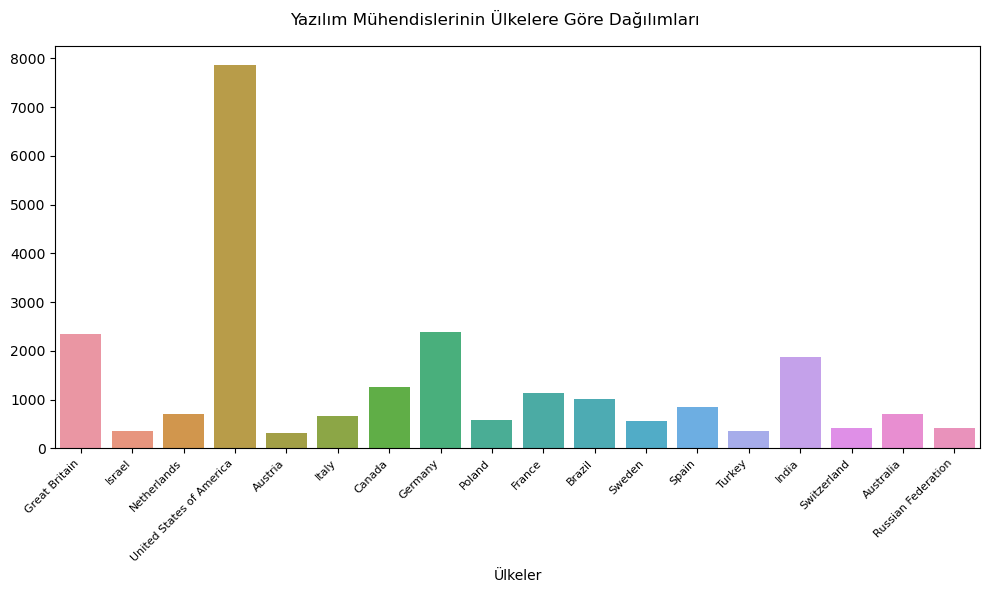

In [268]:
plt.figure(figsize=(10, 6))
plt.suptitle('Yazılım Mühendislerinin Ülkelere Göre Dağılımları')
ax = sns.countplot(data=df, x='Country')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Ülkeler')
plt.ylabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [269]:
df.shape

(23755, 4)

In [204]:
out=[]
def outlier(x):
    threshold = 3
    mean = np.mean(x)
    std = np.std(x)
    for i in x:
        z = (i-mean)/std
        if np.abs(z)>threshold:
            out.append(i)
    return out

In [205]:
#import numpy as np
#
#def outlier(x):
#    threshold = 3
#    mean = np.mean(x)
#    std = np.std(x)
#    outliers = []
#    for i in x:
#        z = (i - mean) / std
#        if np.abs(z) > threshold:
#            outliers.append(i)
#    return outliers
#
#outliers = outlier(df['YearlySalary'])
#df = df[~df['YearlySalary'].isin(outliers)]

#print(df)


In [206]:
df.shape

(23755, 4)

In [270]:
Q1 = df['Salary_in_usd_yearly'].quantile(0.25)
Q3 = df['Salary_in_usd_yearly'].quantile(0.75)
IQR = Q3 - Q1

In [271]:
#Aykırı değerleri filtrele
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary_in_usd_yearly'] >= lower_bound) & (df['Salary_in_usd_yearly'] <= upper_bound)]


In [209]:
#filtered_df = df.copy()


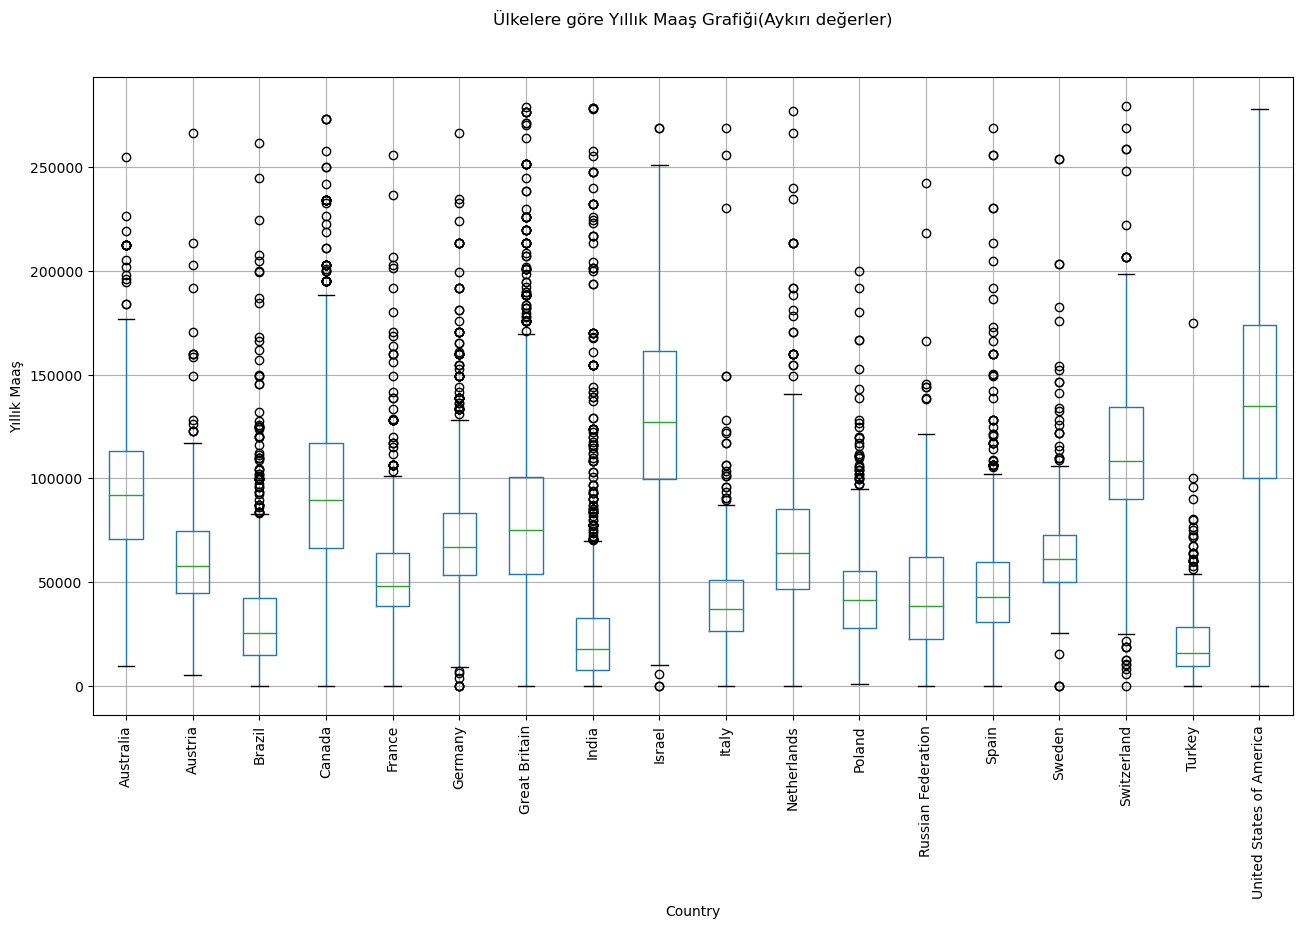

In [272]:
fig, ax = plt.subplots(1,1,figsize=(15,8.5))
filtered_df.boxplot('Salary_in_usd_yearly','Country',ax=ax)
plt.suptitle('Ülkelere göre Yıllık Maaş Grafiği(Aykırı değerler)')
plt.title('')
plt.ylabel('Yıllık Maaş')
plt.xticks(rotation=90)
plt.show()

In [273]:
df.shape

(21849, 4)

<Axes: xlabel='Salary_in_usd_yearly'>

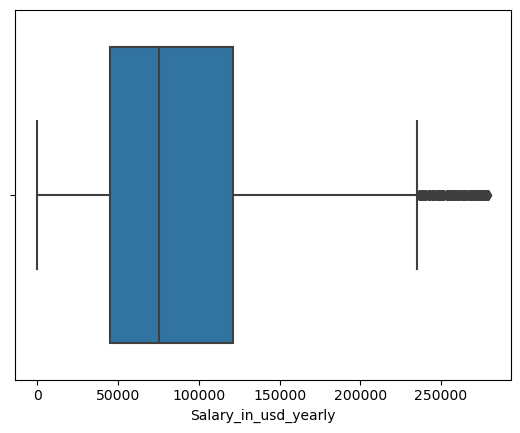

In [274]:
sns.boxplot(data=df, x='Salary_in_usd_yearly')

<Axes: xlabel='Salary_in_usd_yearly'>

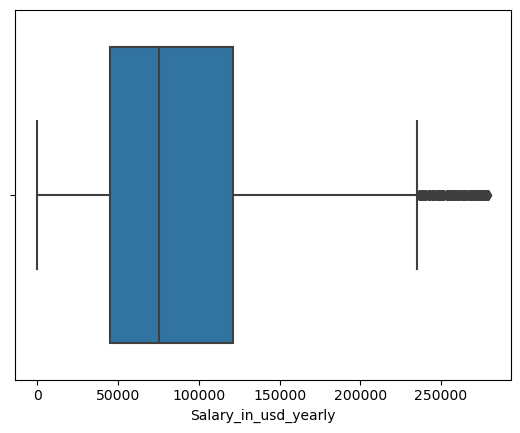

In [275]:
sns.boxplot(data=filtered_df, x='Salary_in_usd_yearly')

In [276]:
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25) 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1  
    lower_bound = q1 - 1.5 * iqr  
    higher_bound = q3 + 1.5 * iqr  
    outliers = data[(data[column] < lower_bound) | (data[column] > higher_bound)]
    return outliers

outliers = detect_outliers(df, "Salary_in_usd_yearly")
data_without_outliers = df.drop(outliers.index)
df = data_without_outliers.copy()

In [279]:
#data_without_outliers = df.drop(outliers.index)


In [280]:
df

,Country,EdLevel,YearsCodePro,Salary_in_usd_yearly
2,Great Britain,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,Great Britain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,65000.0
...,...,...,...,...
73113,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,94000.0
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,115000.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,70000.0
73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,35192.0


<Axes: xlabel='Salary_in_usd_yearly'>

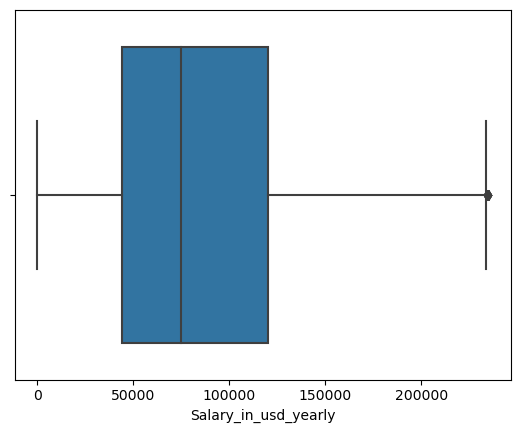

In [281]:
sns.boxplot(data=data_without_outliers, x='Salary_in_usd_yearly')

In [282]:
df = data_without_outliers.copy()

<Axes: xlabel='Salary_in_usd_yearly'>

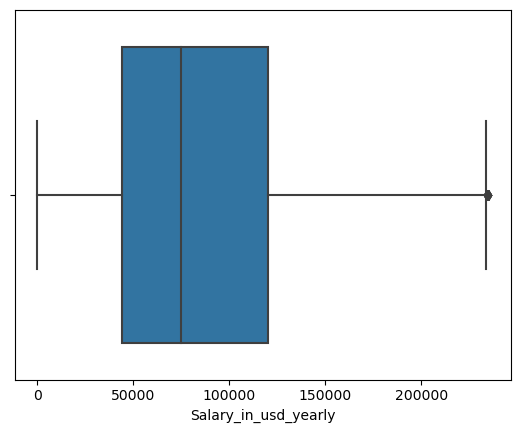

In [283]:
sns.boxplot(data=df, x='Salary_in_usd_yearly')

In [284]:
df["YearsCodePro"].unique()

array(['5', '17', '6', '2', '10', '22', '4', '20', '9', '14', '21', '15',
       '3', '25', '8', '12', '7', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [285]:
def filter_ycp(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    else:
        try:
            return float(x)
        except ValueError:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(filter_ycp)

In [286]:
df["YearsCodePro"].unique()

array([ 5. , 17. ,  6. ,  2. , 10. , 22. ,  4. , 20. ,  9. , 14. , 21. ,
       15. ,  3. , 25. ,  8. , 12. ,  7. , 19. , 24. ,  1. , 11. , 23. ,
        0.5, 18. , 37. , 46. , 13. , 32. , 27. , 28. , 16. , 31. , 30. ,
       34. , 35. , 26. , 42. , 38. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [287]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [288]:
def filter_EL(x):
    if "Bachelor’s degree" in x:
        return "Lisans"
    elif "Master’s degree" in x:
        return "Yuksek Lisans"
    elif any(edu in x for edu in ["Professional degree", "Other doctoral degree"]):
        return "Lisansüstü"
    else:
        return 'Lisans eğitimi yok'


In [289]:
df['EdLevel'] = df['EdLevel'].apply(filter_EL)

In [290]:
df["EdLevel"].unique()

array(['Yuksek Lisans', 'Lisans', 'Lisans eğitimi yok', 'Lisansüstü'],
      dtype=object)

In [292]:
df = df[df['Salary_in_usd_yearly'] <= 199999]

In [293]:
from sklearn.preprocessing import LabelEncoder

In [294]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([3, 0, 1, 2])

In [295]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([ 6, 10, 17,  1,  9,  3,  5,  8, 11,  4,  2, 14, 13, 16,  7,  0, 15,
       12])

In [296]:
X = df.drop("Salary_in_usd_yearly",axis=1)
y = df['Salary_in_usd_yearly']

In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=0)
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)
rf_y_pred = random_forest_reg.predict(X_test)
rf_error = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print("Random Forest")
print("RMSE: ", rf_error)
rf_r2 = r2_score(y_test, rf_y_pred)
print("R2 Skoru: ", rf_r2)


Random Forest
RMSE:  24500.771316156523
R2 Skoru:  0.6020246778085626


In [299]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

knn_y_pred = knn_reg.predict(X_test)

knn_error = np.sqrt(mean_squared_error(y_test, knn_y_pred))
print("K-Nearest Neighbors (KNN)")
print("RMSE: ", knn_error)

knn_r2 = r2_score(y_test, knn_y_pred)
print("R2 Skoru: ", knn_r2)


K-Nearest Neighbors (KNN)
RMSE:  25971.440807792445
R2 Skoru:  0.5528134667991541


In [300]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_y_pred = linear_reg.predict(X_test)
linear_error = np.sqrt(mean_squared_error(y_test, linear_y_pred))
print("Linear Regression")
print("RMSE: ", linear_error)
linear_r2 = r2_score(y_test, linear_y_pred)
print("R2 Skoru: ", linear_r2)


Linear Regression
RMSE:  34323.369597239114
R2 Skoru:  0.21895426848715638


In [301]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dtree_y_pred = dt_reg.predict(X_test)
dtree_error = np.sqrt(mean_squared_error(y_test, dtree_y_pred))
print("Decision Tree Regression")
print("RMSE: ", dtree_error)
dtree_r2 = r2_score(y_test, dtree_y_pred)
print("R2 Skoru: ", dtree_r2)


Decision Tree Regression
RMSE:  24944.26704827259
R2 Skoru:  0.5874865396210629


In [234]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)
ridge_error = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print("Ridge Regression")
print("RMSE: ", ridge_error)
ridge_r2 = r2_score(y_test, ridge_y_pred)
print("R2 Skoru: ", ridge_r2)


Ridge Regression
RMSE:  40009.731725793856
R2 Skoru:  0.2801488062246714


In [235]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_y_pred = lasso_reg.predict(X_test)
lasso_error = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
print("Lasso Regression")
print("RMSE: ", lasso_error)
lasso_r2 = r2_score(y_test, lasso_y_pred)
print("R2 Skoru: ", lasso_r2)


Lasso Regression
RMSE:  40009.729651694804
R2 Skoru:  0.28014888085864553


In [236]:
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet()
enet_reg.fit(X_train, y_train)
enet_y_pred = enet_reg.predict(X_test)
enet_error = np.sqrt(mean_squared_error(y_test, enet_y_pred))
print("ElasticNet Regression")
print("RMSE: ", enet_error)
enet_r2 = r2_score(y_test, enet_y_pred)
print("R2 Skoru: ", enet_r2)


ElasticNet Regression
RMSE:  40014.42229867175
R2 Skoru:  0.27998001167073794


In [237]:
from sklearn.tree import DecisionTreeRegressor

In [241]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 4, 8, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt_reg = grid_search.best_estimator_

dtree_y_pred = best_dt_reg.predict(X_test)

dtree_error = np.sqrt(mean_squared_error(y_test, dtree_y_pred))
print("Decision Tree Regression")
print("RMSE: ", dtree_error)

dtree_r2 = r2_score(y_test, dtree_y_pred)
print("R2 Skoru: ", dtree_r2)


Decision Tree Regression
RMSE:  28916.3420842735
R2 Skoru:  0.6239910709086938


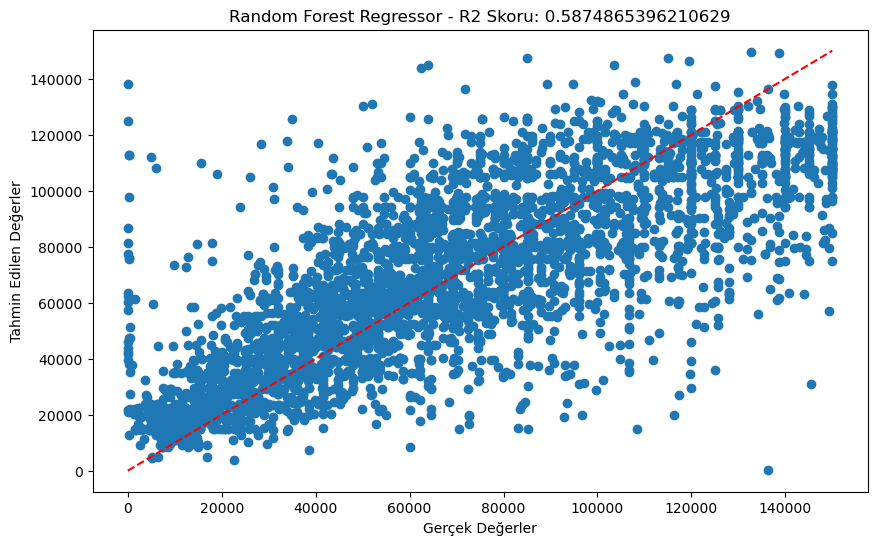

In [302]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dtree_y_pred)
plt.plot([min(y.values), max(y.values)], [min(y.values), max(y.values)], 'r--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Regressor - R2 Skoru: {}'.format(dtree_r2))
plt.show()

In [82]:
##tensorflow

In [83]:
#max_depth=[None,2,4,6,8,10,12]
#parameters = {"max_depth":max_depth}
#regressor = DecisionTreeRegressor(random_state=0)
#gs = GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
#gs.fit(X,y.values)

In [84]:
import pickle

In [86]:
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education}
with open('stackof_pickle_file.pkl','wb') as file:
    pickle.dump(data,file)
    

In [87]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [88]:
y_pred = regressor_loaded.predict(X)
y_pred

array([ 83773.04761905, 170988.        ,  64753.5       , ...,
        93944.94871795,  43848.08333333,  63202.53846154])

In [89]:
df.head()

,Country,EdLevel,YearsCodePro,YearlySalary
2,Great Britain,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,Great Britain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,65000.0
